In [3]:
from PIL import Image #PIL - biblioteca Pillow
import os #permite que o Python realize interações com o sistema operacional e gerenciamento de arquivos
import json
import time

import pickle as pkl #bibliteca para serializar (salvar) objetos python em arquivo

import cv2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from keras.preprocessing import image #Redimensionamento das imagens
from sklearn.preprocessing import LabelEncoder, OneHotEncoder #one hot encoding
from sklearn.model_selection import StratifiedKFold
from keras.applications.mobilenet import preprocess_input #Pré-processamento específico da MobileNet (normalização) à imagem
from keras.applications.resnet50 import preprocess_input as resnet_preprocess_input #precisa colocar o "as" para não sobrescrever a função preprocess_input da MobileNET
from tensorflow.keras.callbacks import EarlyStopping


from sklearn.model_selection import train_test_split #Separação em treino e teste

#Treinamento do modelo
import tensorflow as tf
from keras.layers import Dense, GlobalAveragePooling2D, BatchNormalization, Flatten, Dropout
from keras.applications import MobileNet, ResNet50
from keras.models import Model
import keras.backend as K #suporte para diversas operações matemáticas, manipulação de tensores, etc.

#Métricas
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, f1_score, classification_report, precision_score
import pickle

In [4]:
# Carregando a variável do arquivo
with open('/kaggle/input/pre-processamentoa/imagens_redimensionadas.pkl', 'rb') as arquivo:
    x_orig = pickle.load(arquivo)

with open('/kaggle/input/pre-processamentoa/y_orig_mod.pkl', 'rb') as arquivo:
    y_orig = pickle.load(arquivo)
    

In [5]:
x_orig = np.array(x_orig)
y_orig = np.array(y_orig)

In [7]:
from scipy.signal import wiener
# Aplicando o filtro de Wiener em cada canal RGB e recombinando os canais corretamente
x_filtrado = np.empty_like(x_orig)  # Criando um array vazio com as mesmas dimensões das imagens originais
for i in range(len(x_orig)):
    for c in range(3):  # Há três canais para imagens RGB
        x_filtrado[i, :, :, c] = wiener(x_orig[i, :, :, c])

# Verificação das dimensões após o filtro
print("Dimensões originais:", x_orig.shape)
print("Dimensões após aplicar o filtro Wiener:", x_filtrado.shape)

/tmp/ipykernel_34/33673152.py:6: RuntimeWarning: invalid value encountered in cast
  x_filtrado[i, :, :, c] = wiener(x_orig[i, :, :, c])


Dimensões originais: (9947, 100, 100, 3)
Dimensões após aplicar o filtro Wiener: (9947, 100, 100, 3)


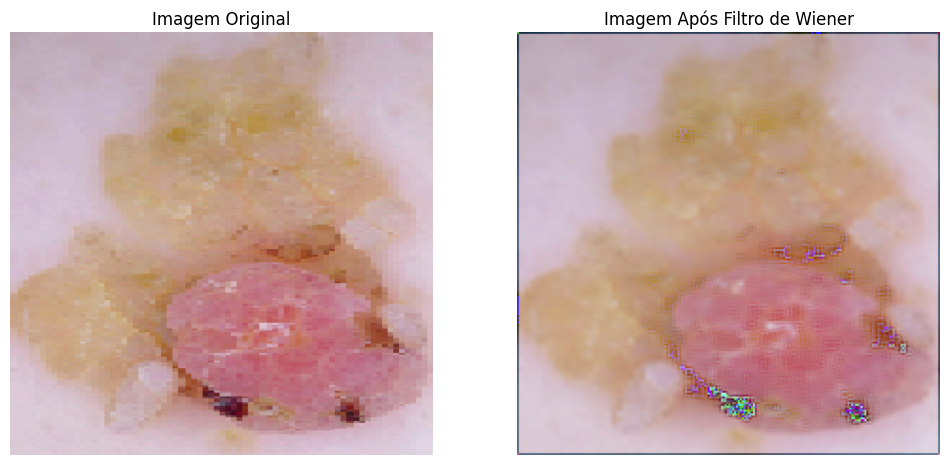

In [9]:
# Para visualização, vamos mostrar uma das imagens original e filtrada
indice_imagem = 10  # Altere este índice para visualizar diferentes imagens
imagem_original = x_orig[indice_imagem]
imagem_filtrada = x_filtrado[indice_imagem]

# Plotando as imagens
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(imagem_original.astype(np.uint8))  # Asegurando que os tipos estão corretos para exibição
plt.title('Imagem Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(imagem_filtrada.astype(np.uint8))
plt.title('Imagem Após Filtro de Wiener')
plt.axis('off')

plt.show()

In [8]:
from scipy.ndimage import gaussian_filter
# Aplicando o filtro Gaussiano em cada canal RGB
sigma = 1  # O parâmetro sigma controla o tamanho do blur. Ajuste conforme necessário.
x_filtrado2 = np.empty_like(x_orig)  # Criando um array vazio com as mesmas dimensões das imagens originais
for i in range(len(x_orig)):
    for c in range(3):  # Três canais para imagens RGB
        x_filtrado2[i, :, :, c] = gaussian_filter(x_orig[i, :, :, c], sigma=sigma)

# Verificação das dimensões após o filtro
print("Dimensões originais:", x_orig.shape)
print("Dimensões após aplicar o filtro Gaussiano:", x_filtrado2.shape)


Dimensões originais: (9947, 100, 100, 3)
Dimensões após aplicar o filtro Gaussiano: (9947, 100, 100, 3)


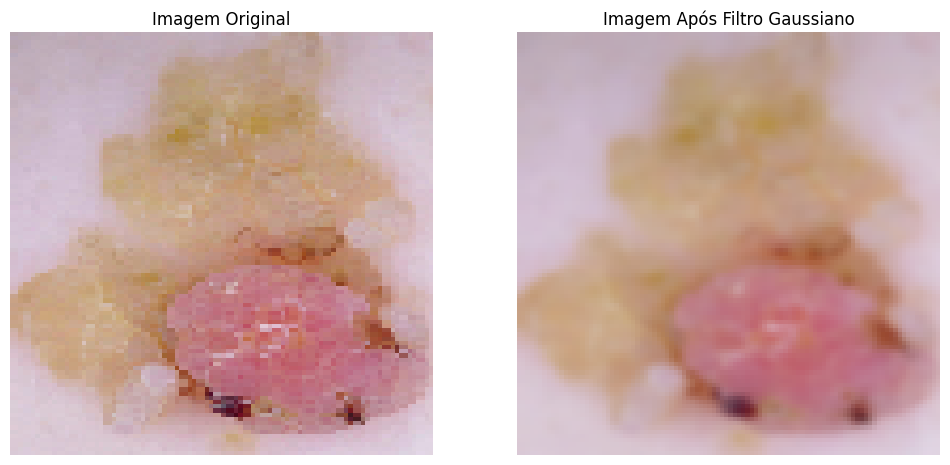

In [9]:
# Para visualização, vamos mostrar uma das imagens original e filtrada
indice_imagem = 10  # Altere este índice para visualizar diferentes imagens
imagem_original = x_orig[indice_imagem]
imagem_filtrada = x_filtrado2[indice_imagem]

# Plotando as imagens
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(imagem_original.astype(np.uint8))  # Asegurando que os tipos estão corretos para exibição
plt.title('Imagem Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(imagem_filtrada.astype(np.uint8))
plt.title('Imagem Após Filtro Gaussiano')
plt.axis('off')

plt.show()

In [6]:
from scipy.ndimage import median_filter
# Definindo o tamanho da janela para o filtro de mediana
size = 3  # Tamanho da janela. Ajuste conforme necessário.

# Aplicando o filtro de mediana em cada canal RGB
x_filtrado3 = np.empty_like(x_orig)  # Criando um array vazio com as mesmas dimensões das imagens originais
for i in range(len(x_orig)):
    for c in range(3):  # Três canais para imagens RGB
        x_filtrado3[i, :, :, c] = median_filter(x_orig[i, :, :, c], size=size)

# Verificação das dimensões após o filtro
print("Dimensões originais:", x_orig.shape)
print("Dimensões após aplicar o filtro de mediana:", x_filtrado3.shape)

Dimensões originais: (9947, 100, 100, 3)
Dimensões após aplicar o filtro de mediana: (9947, 100, 100, 3)


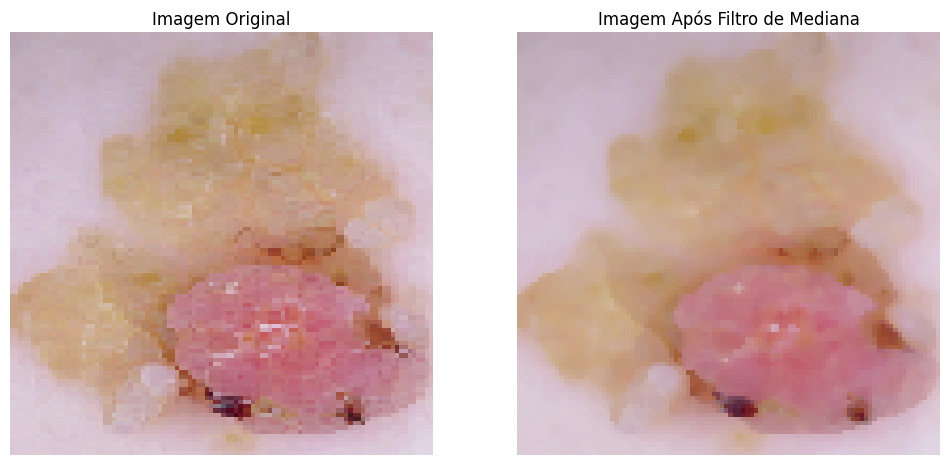

In [7]:
# Para visualização, vamos mostrar uma das imagens original e filtrada
indice_imagem = 10  # Altere este índice para visualizar diferentes imagens
imagem_original = x_orig[indice_imagem]
imagem_filtrada = x_filtrado3[indice_imagem]

# Plotando as imagens
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(imagem_original.astype(np.uint8))  # Asegurando que os tipos estão corretos para exibição
plt.title('Imagem Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(imagem_filtrada.astype(np.uint8))
plt.title('Imagem Após Filtro de Mediana')
plt.axis('off')

plt.show()

In [8]:
# Assumindo que imagens_redimensionadas é o seu array já existente
# Definir o caminho do arquivo onde os dados serão salvos
caminho_arquivo = '/kaggle/working/x_orig_mod_medianfilter.pkl'  # Ajuste o caminho conforme necessário

# Abrir o arquivo para escrita em modo binário e salvar o array
with open(caminho_arquivo, 'wb') as arquivo:
    pickle.dump(x_filtrado3, arquivo)

print(f"Array de imagens salvo em: {caminho_arquivo}")

Array de imagens salvo em: /kaggle/working/x_orig_mod_medianfilter.pkl


In [10]:
# Assumindo que imagens_redimensionadas é o seu array já existente
# Definir o caminho do arquivo onde os dados serão salvos
caminho_arquivo = '/kaggle/working/x_orig_mod_gaussianfilter.pkl'  # Ajuste o caminho conforme necessário

# Abrir o arquivo para escrita em modo binário e salvar o array
with open(caminho_arquivo, 'wb') as arquivo:
    pickle.dump(x_filtrado2, arquivo)

print(f"Array de imagens salvo em: {caminho_arquivo}")

Array de imagens salvo em: /kaggle/working/x_orig_mod_gaussianfilter.pkl
